In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:\\Users\\ADMIN\Downloads\\cancer_deaths_dataset.csv')

# Display the first few rows of the dataset
print(df.head())
# Get the basic summary of the dataset
print(df.info())
print(df.describe())


      Country Cancer_Type  Total_Deaths  Population_Size
0    Pakistan  Oesophagus        2162.0     2.954020e+08
1      Turkey  Pancreatic           NaN     6.712236e+08
2       Italy     Thyroid        4610.0     1.053903e+09
3      France  Oesophagus        4779.0     1.093359e+09
4  Bangladesh      Breast        1404.0     1.165800e+09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          10000 non-null  object 
 1   Cancer_Type      10000 non-null  object 
 2   Total_Deaths     9499 non-null   float64
 3   Population_Size  9538 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB
None
       Total_Deaths  Population_Size
count   9499.000000     9.538000e+03
mean    2512.783346     7.062911e+08
std     1420.958992     4.048812e+08
min       50.000000     1.031611e+06
25%     1288.500000     3.53703

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5216\14634477.py:7: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('C:\\Users\\ADMIN\Downloads\\cancer_deaths_dataset.csv')


In [22]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in 'Total_Deaths' and 'Population_Size' with the median
df['Total_Deaths'].fillna(df['Total_Deaths'].median(), inplace=True)
df['Population_Size'].fillna(df['Population_Size'].median(), inplace=True)

# Ensure data types are correct
df['Total_Deaths'] = df['Total_Deaths'].astype(float)
df['Population_Size'] =df['Population_Size'].astype(float)

# Verify there are no more missing values
print(df.isnull().sum())


Country            0
Cancer_Type        0
Total_Deaths       0
Population_Size    0
dtype: int64
Country            0
Cancer_Type        0
Total_Deaths       0
Population_Size    0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5216\2454877950.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Deaths'].fillna(df['Total_Deaths'].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5216\2454877950.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5216\1874184070.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


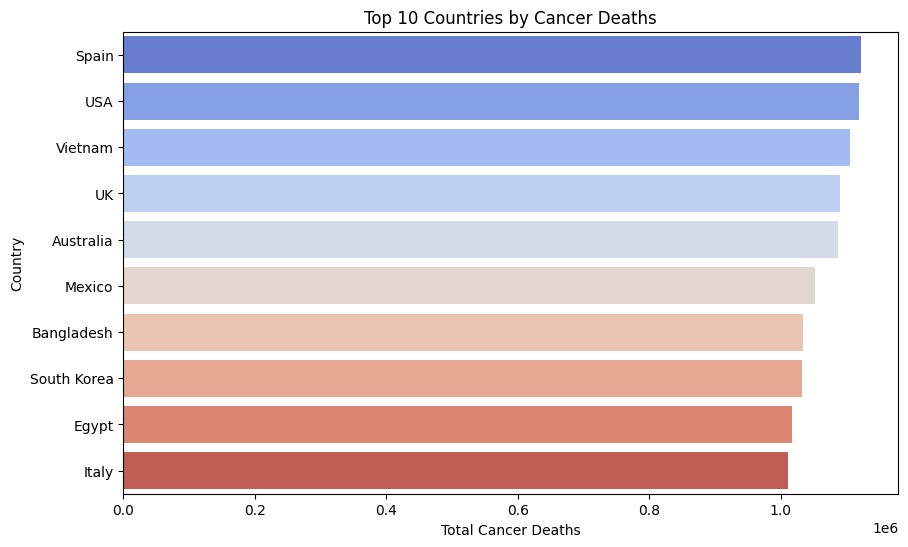

In [23]:
# Group by country and calculate total deaths
top_countries = df.groupby('Country')['Total_Deaths'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 countries by cancer deaths
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Cancer Deaths')
plt.xlabel('Total Cancer Deaths')
plt.ylabel('Country')
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5216\229553102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancer_type_deaths.values, y=cancer_type_deaths.index, palette='Blues_r')


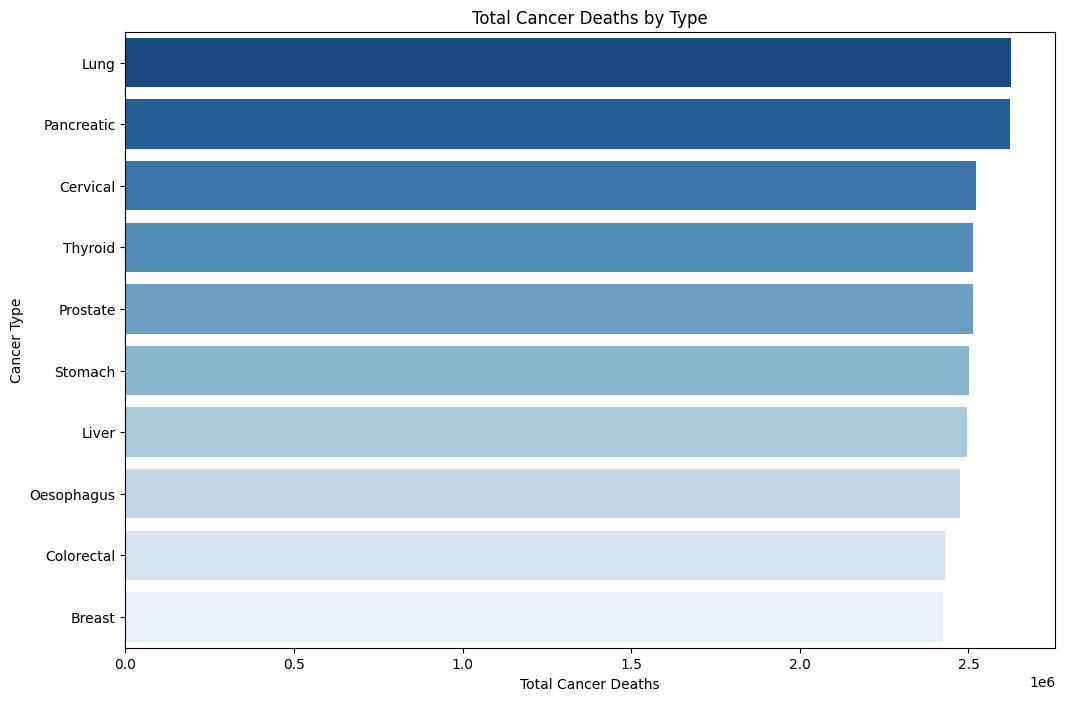

In [24]:
# Group by cancer type and calculate total deaths
cancer_type_deaths = df.groupby('Cancer_Type')['Total_Deaths'].sum().sort_values(ascending=False)

# Plot the distribution of cancer deaths by type
plt.figure(figsize=(12, 8))
sns.barplot(x=cancer_type_deaths.values, y=cancer_type_deaths.index, palette='Blues_r')
plt.title('Total Cancer Deaths by Type')
plt.xlabel('Total Cancer Deaths')
plt.ylabel('Cancer Type')
plt.show()


Correlation between Cancer Deaths and Population Size: 0.0016991666689800497


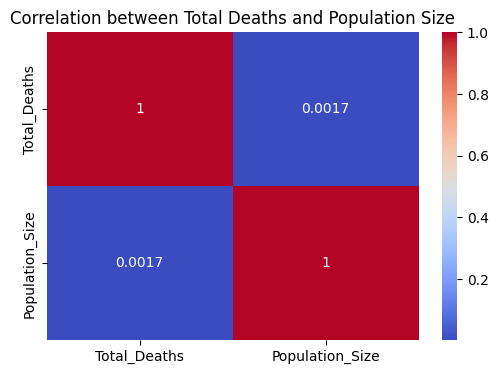

In [25]:
# Calculate correlation
correlation = df['Total_Deaths'].corr(df['Population_Size'])
print(f"Correlation between Cancer Deaths and Population Size: {correlation}")

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Total_Deaths', 'Population_Size']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Total Deaths and Population Size')
plt.show()


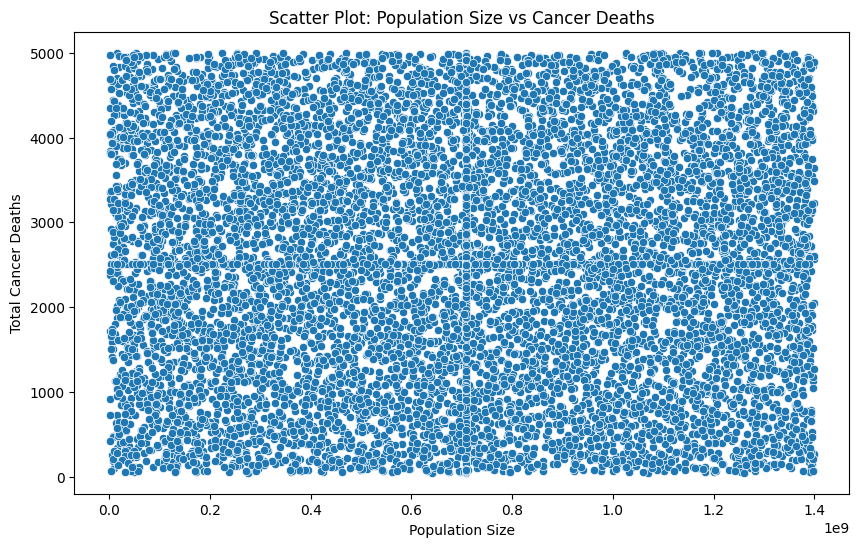

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Population_Size'], y=df['Total_Deaths'])
plt.title('Scatter Plot: Population Size vs Cancer Deaths')
plt.xlabel('Population Size')
plt.ylabel('Total Cancer Deaths')
plt.show()
